In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import json
import pickle

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers.legacy import SGD
import random

words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('intents.json').read()
intents = json.loads(data_file)

D:\Downloads\ANACONDA\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
for intent in intents['intents']:
    for pattern in intent['patterns']:

        #tokenize each word
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        #add documents in the corpus
        documents.append((w, intent['tag']))

        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [3]:
# lemmatize, lower each word and remove duplicates
words = [lemmatizer.lemmatize(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique lemmatized words", words)

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

99 documents
24 classes ['Identity', 'activity', 'age', 'appreciate', 'contact', 'creator', 'datetime', 'exclaim', 'goodbye', 'greeting', 'greetreply', 'haha', 'insult', 'jokes', 'nicetty', 'no', 'noanswer', 'options', 'programmer', 'riddle', 'suggest', 'thanks', 'weather', 'whatsup']
113 unique lemmatized words ["'m", "'s", ',', 'a', 'age', 'am', 'anyone', 'are', 'ask', 'awesome', 'bad', 'be', 'belief', 'believe', 'best', 'bye', 'can', 'chatting', 'contact', 'could', 'created', 'creator', 'date', 'day', 'designed', 'developer', 'do', 'doe', 'doing', 'dumb', 'exist', 'exists', 'fine', 'for', 'funny', 'god', 'good', 'goodbye', 'great', 'haha', 'hello', 'help', 'helpful', 'helping', 'hey', 'hi', 'hola', 'hot', 'how', 'human', 'i', 'idiot', 'in', 'is', 'it', 'joke', 'karan', 'know', 'later', 'laugh', 'lmao', 'lol', 'made', 'make', 'me', 'next', 'nice', 'no', 'nope', 'offered', 'ok', 'old', 'programmed', 'programmer', 'provide', 'question', 'riddle', 'rofl', 'see', 'shut', 'suggest', 'sugg

In [4]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    # lemmatize each word - create base word, in attempt to represent related words
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])
    
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training, dtype="object")
train_x = list(training[:,0])
train_y = list(training[:,1])
print("Training data created")


Training data created


In [5]:
testing = []

for doc in documents:  
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1

    testing.append([bag, output_row])

random.shuffle(testing)
testing = np.array(testing, dtype="object")
test_x = list(testing[:, 0])
test_y = list(testing[:, 1])
print("Testing data created")

Testing data created


In [6]:
# Create model - 3 layers. First layer 128 neurons, second layer 64 neurons and 3rd output layer contains number of neurons
# equal to number of intents to predict output intent with softmax
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_y[0]), activation='softmax'))


# Compile model. Stochastic gradient descent with Nesterov accelerated gradient gives good results for this model
sgd = SGD(learning_rate=0.01, decay=0.0001, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Fitting and saving the model 
hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
print("model created")

Epoch 1/200
20/20 [==============================] - 0s 981us/step - loss: 3.1780 - accuracy: 0.0606
Epoch 2/200
20/20 [==============================] - 0s 862us/step - loss: 3.1488 - accuracy: 0.1010
Epoch 3/200
20/20 [==============================] - 0s 908us/step - loss: 3.0881 - accuracy: 0.1111
Epoch 4/200
20/20 [==============================] - 0s 815us/step - loss: 3.0465 - accuracy: 0.1212
Epoch 5/200
20/20 [==============================] - 0s 903us/step - loss: 2.9527 - accuracy: 0.1818
Epoch 6/200
20/20 [==============================] - 0s 876us/step - loss: 2.9590 - accuracy: 0.1313
Epoch 7/200
20/20 [==============================] - 0s 846us/step - loss: 2.8383 - accuracy: 0.1717
Epoch 8/200
20/20 [==============================] - 0s 883us/step - loss: 2.7509 - accuracy: 0.2525
Epoch 9/200
20/20 [==============================] - 0s 918us/step - loss: 2.6746 - accuracy: 0.2121
Epoch 10/200
20/20 [==============================] - 0s 866us/step - loss: 2.6510 - accura

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

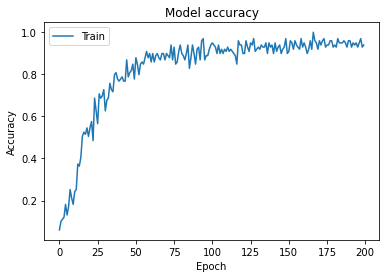

In [8]:
# Plot training accuracy values
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

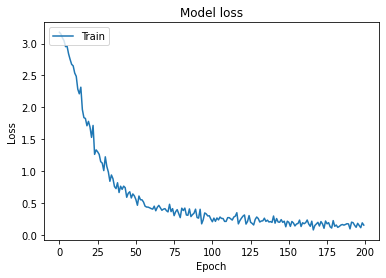

In [9]:
# Plot training loss values
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [10]:
# Generate predictions
predictions = model.predict(np.array(test_x))

# Get class predictions
predicted_classes = [np.argmax(pred) for pred in predictions]
true_classes = [np.argmax(true) for true in test_y]

4/4 [==============================] - 0s 2ms/step


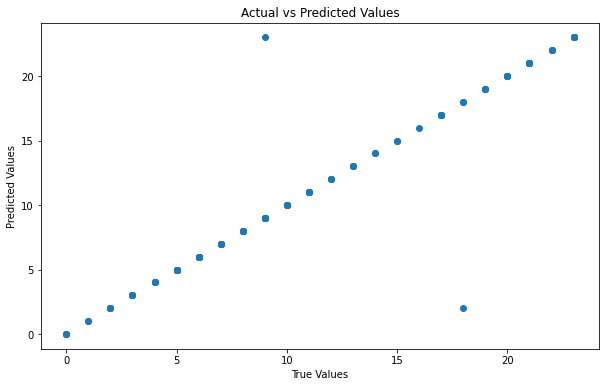

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(true_classes, predicted_classes)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

In [12]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words
# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence

def bow(sentence, words, show_details=True):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words) 
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    # filter out predictions below a threshold
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.25
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['tag']== tag):
            result = random.choice(i['responses'])
            break
    return result

def chatbot_response(text):
    ints = predict_class(text, model)
    res = getResponse(ints, intents)
    return res

In [ ]:
print("Chatbot: Hello! How can I help you today? (type 'quit' to exit)")
while True:
    user_input = input("You: ")
    
    if user_input.lower() == 'quit':
        print("Chatbot: Goodbye!")
        break
    
    response = chatbot_response(user_input)
    print("Cynthia:", response)

Chatbot: Hello! How can I help you today? (type 'quit' to exit)
You: who are u
1/1 [==============================] - 0s 13ms/step
Cynthia: I am Cynthia, a Deep-Learning chatbot
